In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
def WireframeSphere(centre=[0.,0.,0.], radius=1.,
                    n_meridians=20, n_circles_latitude=None):
    """
    Create the arrays of values to plot the wireframe of a sphere.

    Parameters
    ----------
    centre: array like
        A point, defined as an iterable of three numerical values.
    radius: number
        The radius of the sphere.
    n_meridians: int
        The number of meridians to display (circles that pass on both poles).
    n_circles_latitude: int
        The number of horizontal circles (akin to the Equator) to display.
        Notice this includes one for each pole, and defaults to 4 or half
        of the *n_meridians* if the latter is larger.

    Returns
    -------
    sphere_x, sphere_y, sphere_z: arrays
        The arrays with the coordinates of the points to make the wireframe.
        Their shape is (n_meridians, n_circles_latitude).

    Examples
    --------
    >>> plt.figure()
    >>> ax = plt.axes(projection='3d')
    >>> ax.set_aspect("equal")
    >>> sphere = ax.plot_wireframe(*WireframeSphere(), color="r", alpha=0.5)
    >>> plt.show()
    """
    if n_circles_latitude is None:
        n_circles_latitude = max(n_meridians/2, 4)
    u, v = np.mgrid[0:2*np.pi:n_meridians*1j, 0:np.pi:n_circles_latitude*1j]
    sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = centre[2] + radius * np.cos(v)
    return sphere_x, sphere_y, sphere_z

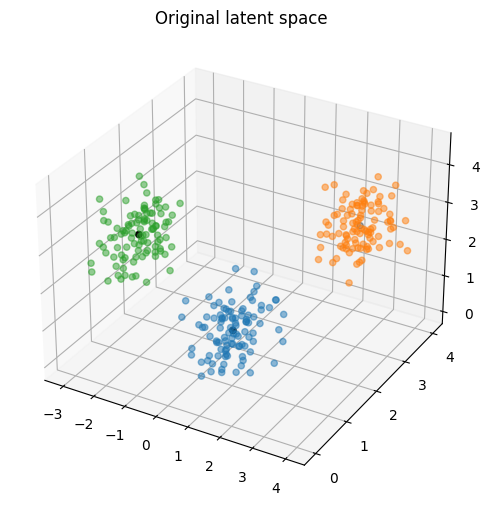

In [11]:
#random.seed(100)
#x, y = make_blobs(n_samples=300, n_features=3, centers=3, cluster_std=1.)
#x = np.hstack([x[y==0].T, x[y==1].T, x[y==2].T])

x =  np.hstack([np.random.multivariate_normal([1,1,1], 0.2*np.eye(3), 100).T,
                np.random.multivariate_normal([3,3,3], 0.2*np.eye(3), 100).T,
                np.random.multivariate_normal([-2,1,3], 0.2*np.eye(3), 100).T,
                ])  

anchors=np.stack([np.mean(x[:,:100], axis=1), np.mean(x[:,100:200], axis=1), np.mean(x[:,200:300], axis=1)]).T
plt.figure(figsize=(6, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x[0, :100], x[1, :100], x[2, :100], c="tab:blue", alpha=0.5)
ax.scatter3D(x[0, 100:200], x[1, 100:200], x[2, 100:200], c="tab:orange", alpha=0.5)
ax.scatter3D(x[0, 200:300], x[1, 200:300], x[2, 200:300], c="tab:green", alpha=0.5)
ax.scatter3D(anchors[0, :], anchors[1, :], anchors[2, :], c="k")
plt.title("Original latent space")
plt.show() 

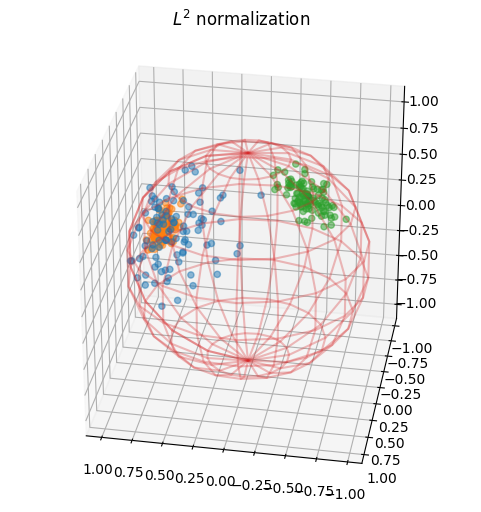

In [12]:
anchors_norm = normalize(anchors, axis=0)
x_norm = normalize(x, axis=0)

plt.figure(figsize=(6, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.set_aspect("equal")
sphere = ax.plot_wireframe(*WireframeSphere(), color="tab:red", alpha=0.3)
ax.scatter3D(x_norm[0, :100], x_norm[1, :100], x_norm[2, :100], c="tab:blue", alpha=0.5)
ax.scatter3D(x_norm[0, 100:200], x_norm[1, 100:200], x_norm[2, 100:200], c="tab:orange", alpha=0.5)
ax.scatter3D(x_norm[0, 200:300], x_norm[1, 200:300], x_norm[2, 200:300], c="tab:green", alpha=0.5)
ax.scatter3D(anchors_norm[0, :], anchors_norm[1, :], anchors_norm[2, :], c="k")
ax.azim = 100
ax.elev = 30
plt.title(r"$L^2$" + " normalization")
plt.show() 

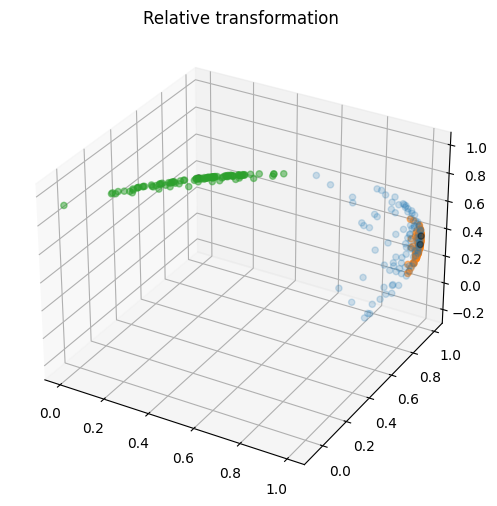

In [13]:
a_trans = anchors_norm.T @ anchors_norm
x_trans = anchors_norm.T @ x_norm

plt.figure(figsize=(6, 6), dpi=100)
ax = plt.axes(projection='3d')

ax.scatter3D(x_trans[0, :100], x_trans[1, :100], x_trans[2, :100], c="tab:blue", alpha=0.2)
ax.scatter3D(x_trans[0, 100:200], x_trans[1, 100:200], x_trans[2, 100:200], c="tab:orange", alpha=0.5)
ax.scatter3D(x_trans[0, 200:300], x_trans[1, 200:300], x_trans[2, 200:300], c="tab:green", alpha=0.5)
ax.scatter3D(a_trans[0, :], a_trans[1, :], a_trans[2, :], c="k")
plt.title("Relative transformation")
plt.show() 